# ¿Puede predecirse la coronariopatía?

En este documento, nos preguntamos si, con las variables que tenemos en heart_clean.csv, se puede llegar a modelizar el estar o no enfermo del corazón.

Para ello, primero observaremos la relación entre las variables predictoras y la variable dependiente (target). Finalmente, construiremos un arbol de decisión y lo visualizaremos.

# Relación entre las variables numéricas

En este apartado pasamos a revisar las relaciones entre las variables numéricas. Se obvia la variable objetivo (target) porque, en realidad, es binaria-categórica y no obtendríamos resultados válidos en un ejercicio de correlación lineal como el que se propone.

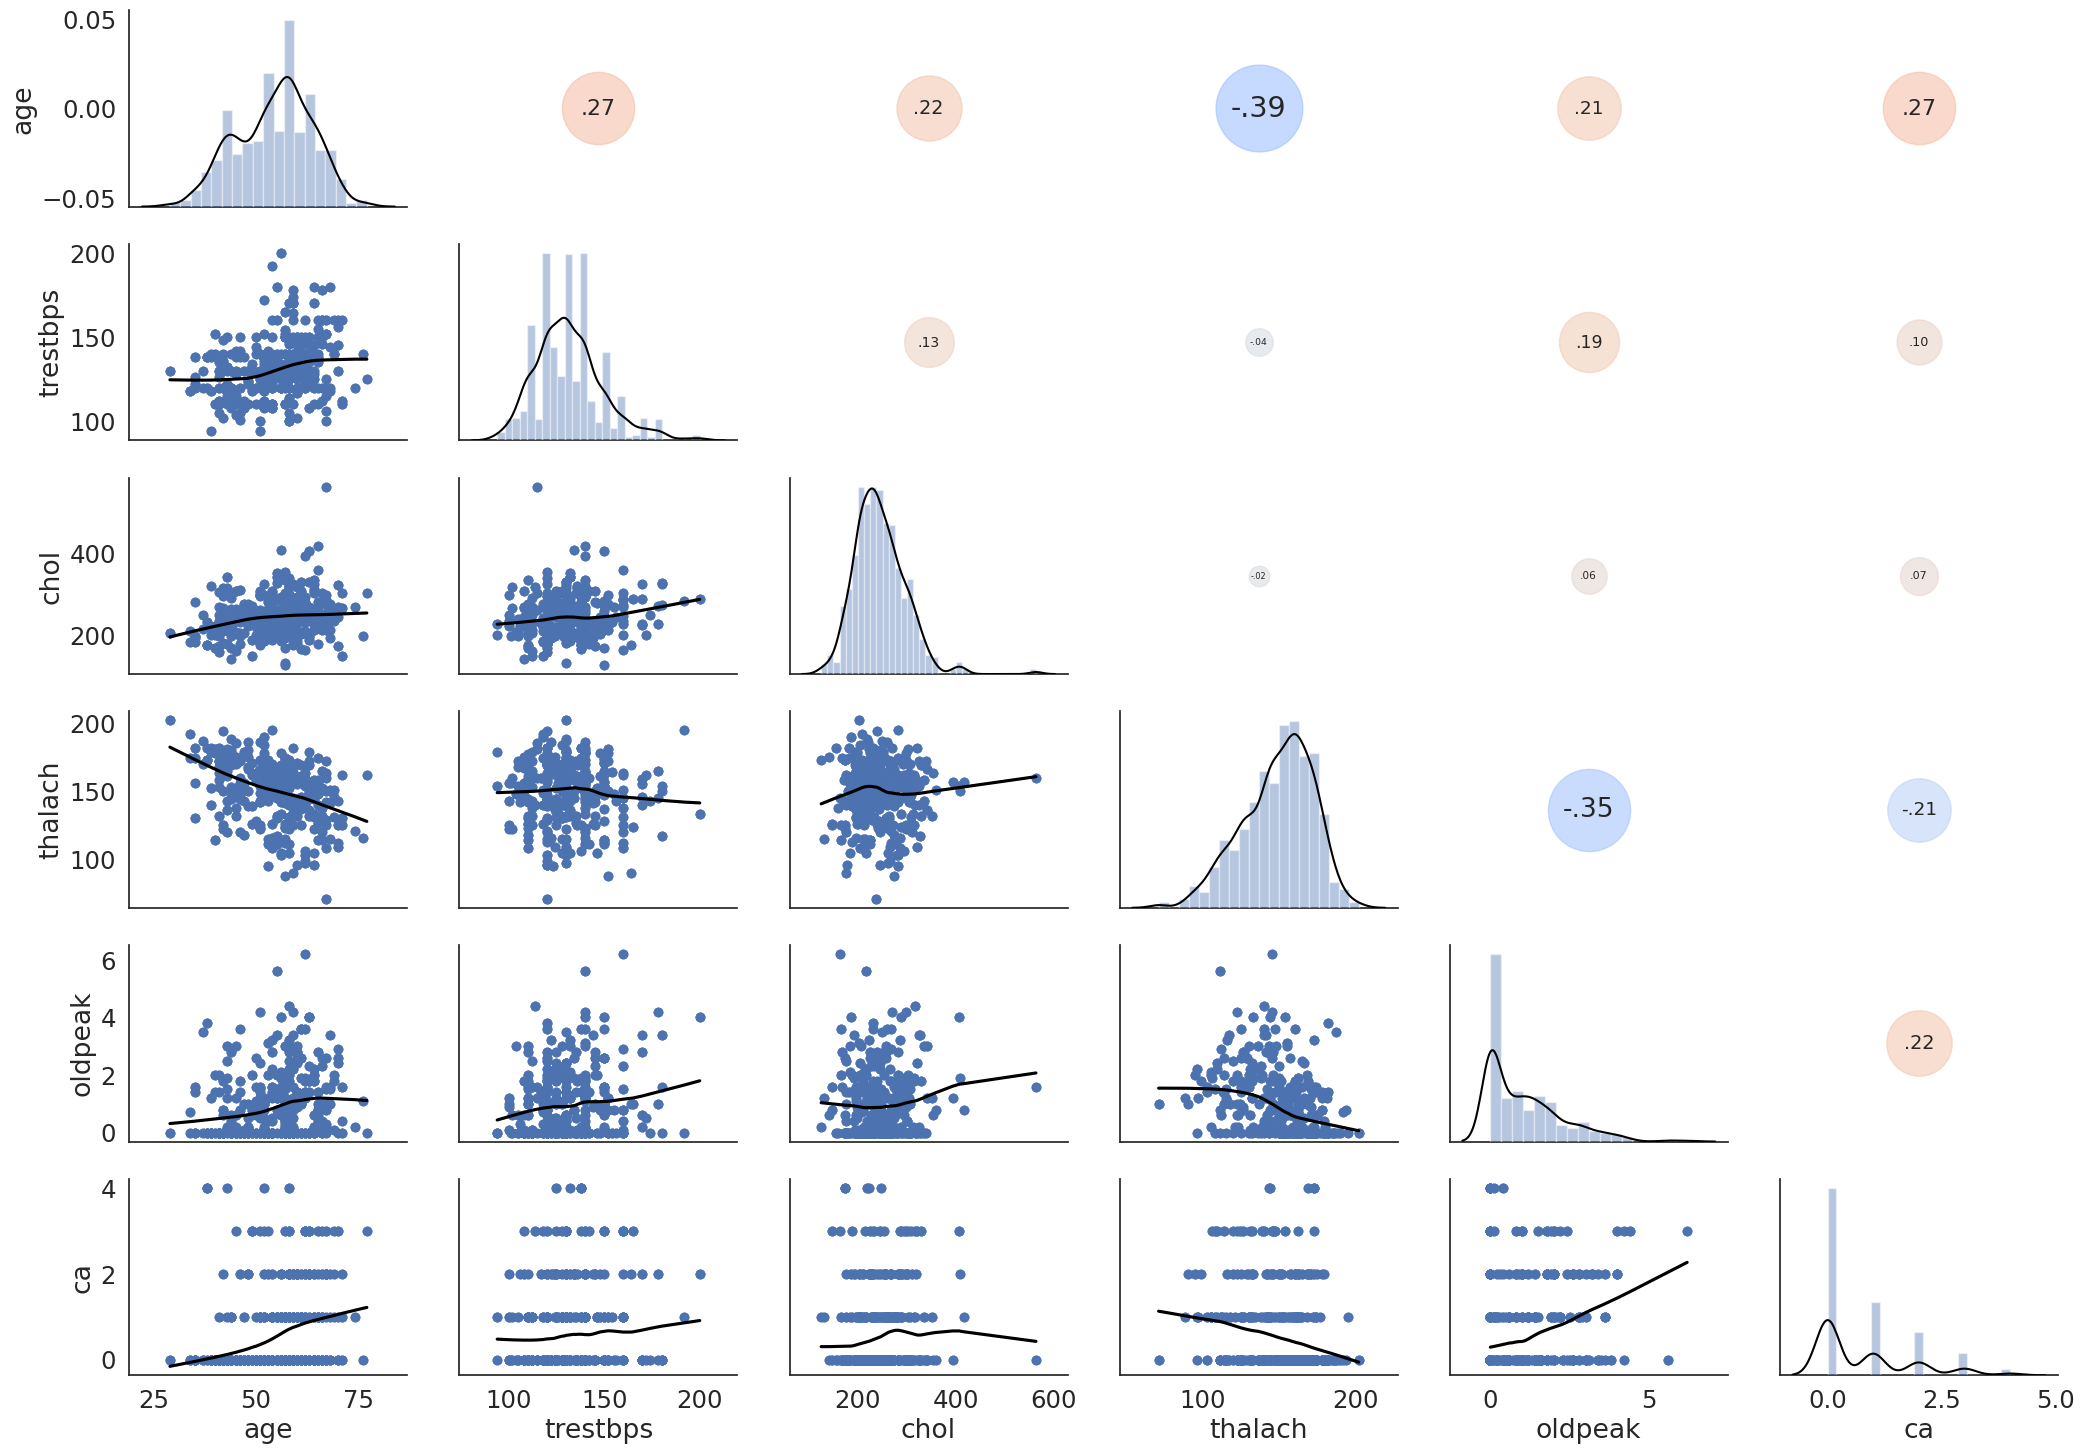

In [1]:
from scripts.marc.ex4 import plot_correlation_matrix

plot_correlation_matrix("heart_clean.csv")

Con la gráfica anterior, observamos que el nivel de correlación entre las variables predictoras es bajo. Todo ello es buena señal: la presencia de multicolinealidad puede comprometer la fiabilidad del modelo.

# Revisión de las variables categóricas

En este apartado nos preguntamos sobre la distribución de algunas variables categóricas. El objetivo es detectar posibles sesgos en la selección de la muestra.

Una de las comprobaciones más evidentes es el tema de la edad y el sexo de los registros, dos variables que sí se pueden controlar y pueden causar confusión de cara a los análisis posteriores.

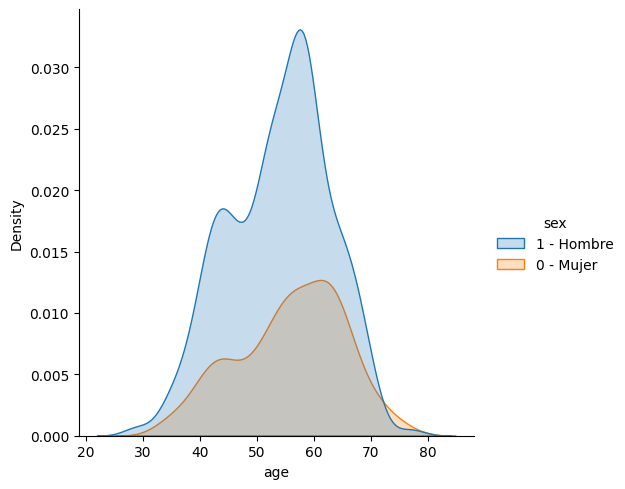

In [1]:
from scripts.marc.ex5 import plot_distribution_by_gender_age

plot_distribution_by_gender_age("heart_clean.csv")

Con la gráfica anterior, podemos ver como el dataset contiene un sesgo en la muestra: hay muchos más hombres que mujeres.

Por otro lado, el tema de la distribución de la edad parece correcto: ambas densidades parecen moverse por los mismos rangos.

# El modelo: un árbol de decisión´

En este apartado, se entrena un modelo de tipo árbol de decisión y se muestran sus resultados de forma gráfica.
Primero, empezamos preparando los datos de entrenamiento y de testeo a una proporción de 0.7 (train)

In [2]:
from scripts.marc.ex6 import get_train_test_datasets

train,test = get_train_test_datasets("heart_clean.csv")
print(f"N train: {len(train)}")
print(f"N test: {len(test)}")

N train: 731
N test: 294


Después, pasamos a entrenar el modelo y, para simplificar, recuperaremos el juego de datos original donde todas las variables son numéricas.

Predecido    0    1
Observado          
0          293   55
1           42  328
Predecido         0         1
Observado                    
0          0.408078  0.076602
1          0.058496  0.456825


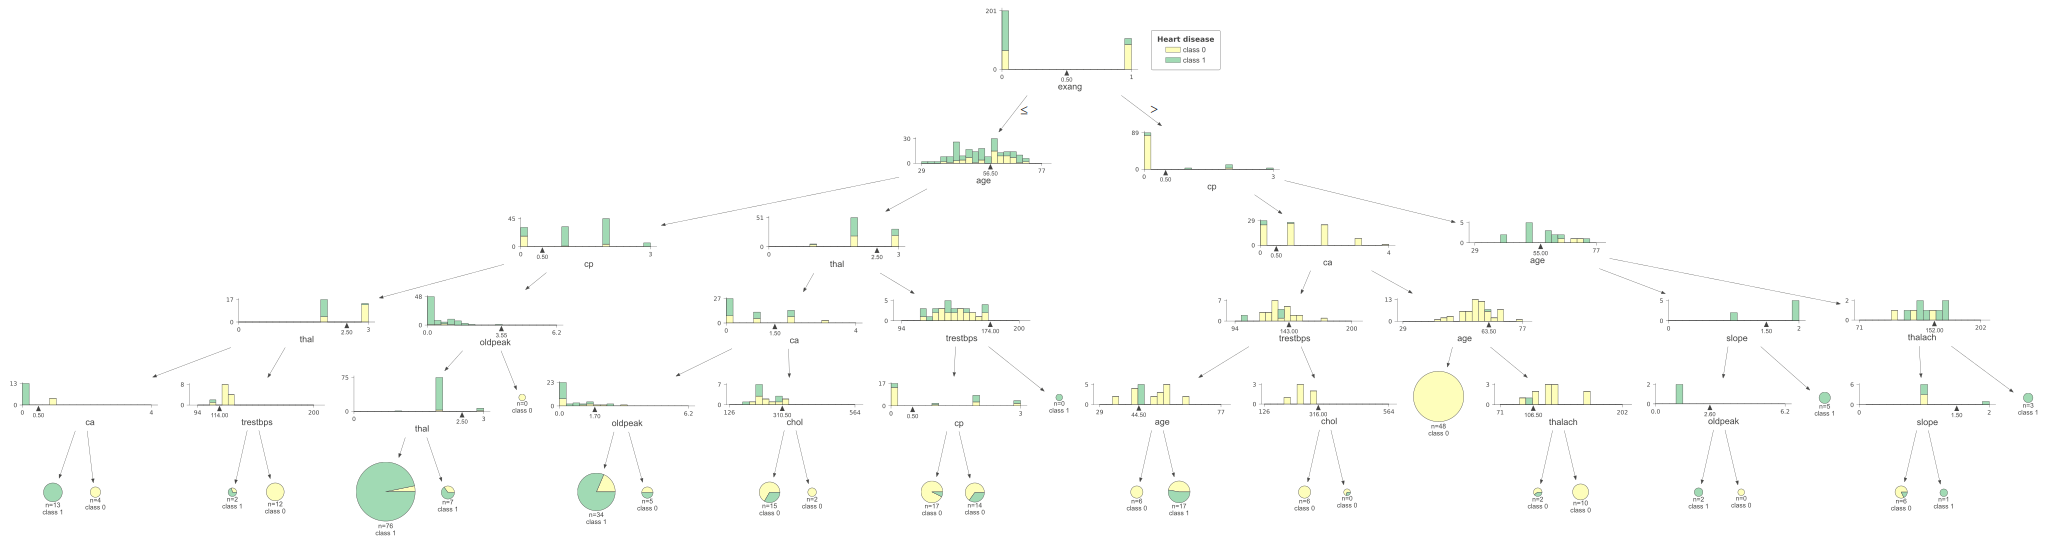

In [1]:
from scripts.marc.ex6 import get_train_test_datasets,get_tree_decision_model,get_confusion_matrix,plot_decision_tree
from sklearn.tree import DecisionTreeClassifier
from pandas import DataFrame

train,test = get_train_test_datasets("heart.csv")
model: DecisionTreeClassifier = get_tree_decision_model(train)
decision_tree = plot_decision_tree(model,test)
confusion_train_absolute: DataFrame = get_confusion_matrix(model,train)
confusion_train_relative: DataFrame = get_confusion_matrix(model,train, values="relative")

# Show results
confusion_train_absolute
confusion_train_relative
decision_tree
#decision_tree.save("plots/decision_tree_train.svg")

Como podemos ver, el modelo ha conseguido modelizar de forma aceptable los juegos de entrenamiento: si realizamos una predicción sobre los datos de entrenamiento, obtenemos que casi un 90% de las observaciones se han clasificado correctamente.

Resulta interesante que, entre las distintas variables, la edad figura como una de las más importantes en aquellos casos donde la enfermedad no ha sido inducida por el ejercicio.

Ahora, pasamos a realizar el mismo ejercicio pero con los datos test, es decir, con datos que el modelo no ha visto.

Predecido    0    1
Observado          
0          132   12
1           12  148
Predecido         0         1
Observado                    
0          0.434211  0.039474
1          0.039474  0.486842


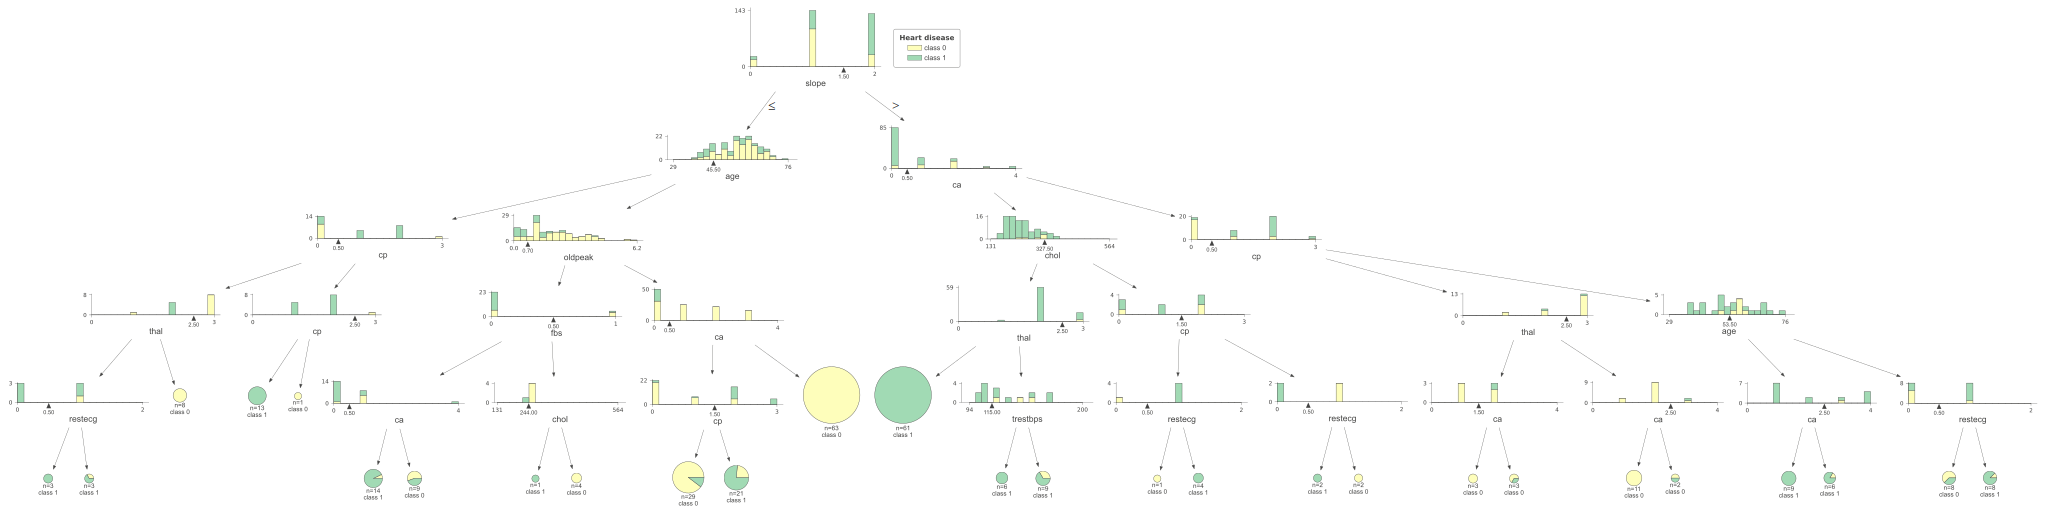

In [7]:
from scripts.marc.ex6 import get_train_test_datasets,get_tree_decision_model,get_confusion_matrix,plot_decision_tree
from sklearn.tree import DecisionTreeClassifier
from pandas import DataFrame

train,test = get_train_test_datasets("heart.csv")
model: DecisionTreeClassifier = get_tree_decision_model(test)
decision_tree = plot_decision_tree(model,test)
confusion_test_absolute: DataFrame = get_confusion_matrix(model,test)
confusion_test_relative: DataFrame = get_confusion_matrix(model,test, values="relative")

# Show results
confusion_test_absolute
confusion_test_relative
decision_tree
#decision_tree.save("plots/decision_tree_test.svg")

El resultado es parecido: cerca de un 90% de acierto, pero la gráfica resultante es distinta.

En este caso, la variable angina inducida por el ejercicio ya no aparece y, en su lugar, el nodo principal es la pendiente del segmento ST. La edad mantiene posición.

# Conclusiones

A la vista de los resultados anteriores, se puede concluir que sí, se podría realizar un modelo para predecir la presencia o no de enfermedad según mediciones físicas del individuo.

El análisis, pero, no está completo: estos resultados tendrían que ser validados e interpretados por un especialista en la materia.